<a href="https://colab.research.google.com/github/utpalrtw/git-practive/blob/master/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Zomato Data Analysis Using Python

1) Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dowload csv data file : https://drive.google.com/file/d/1lamgErENUmuzvENgl4nMtbaJohwEP8KP/view?usp=sharing



In [ ]:
# importing data file and analysis

Data = pd.read_csv('/content/Zomato data .csv', delimiter= ',')
print(Data.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
# Removing the denominator from rate column

def rate_convert(value):
  value = str(value).split('/')
  value = value[0];
  return float(value)

In [ ]:
Data['rate'] = Data['rate'].apply(rate_convert)

print(Data.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
Data.info()   #getting information of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


we don't have null value so we can proceed
* we have 4 columns with object Dtype
* we have 2 columns of int64 Dtype
* we have 1 colum with float Dtype

Text(0.5, 0, 'Restaurant Type')

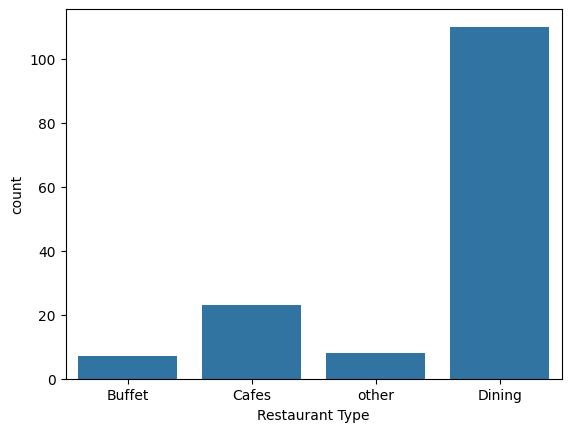

In [ ]:
# examining listed_in(type) columns

sns.countplot(x=Data['listed_in(type)'])
plt.xlabel("Restaurant Type")

* We can see most of the restaurant is **Dining** type and the **Buffet** type Restaurant is very less.

Text(0, 0.5, 'Votes')

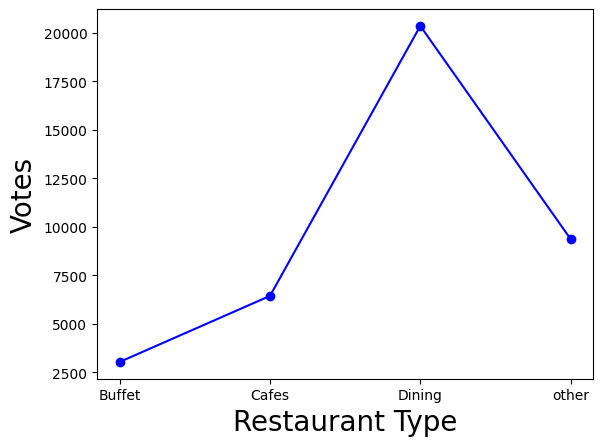

In [ ]:
grouped_data = Data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="b", marker="o")
plt.xlabel("Restaurant Type", c="black", size=20)
plt.ylabel("Votes", c="black", size=20)

Highest Vote is for *Dining* Restaurant.

In [ ]:
# Now we will determine the restaurant’s name that received the maximum votes.
max_votes = Data['votes'].max()
restaurant_with_max_v = Data.loc[Data['votes']==max_votes,'name']

print('Restauran with max vote is :')
print(restaurant_with_max_v)


Restauran with max vote is :
38    Empire Restaurant
Name: name, dtype: object


Text(0.5, 0, 'Online Order')

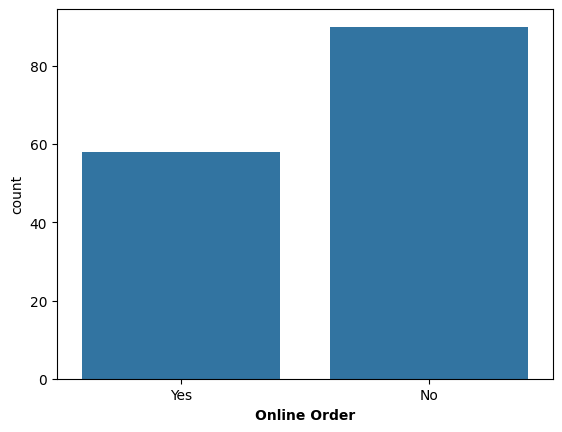

In [ ]:
# exploring online order column

sns.countplot(x=Data['online_order'])
plt.xlabel('Online Order', weight="bold")

Most of the restaurant Does not accept online order.

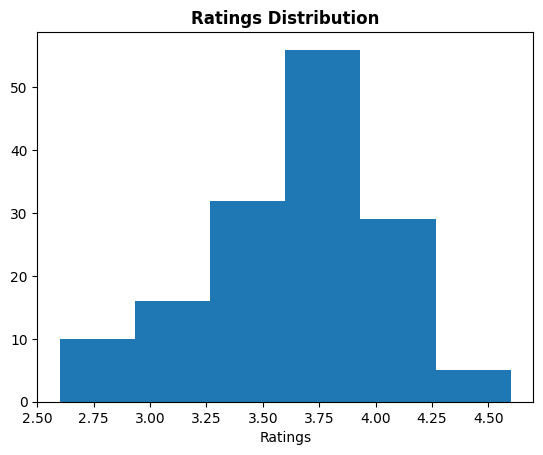

In [ ]:
#exploring Rate column
plt.hist(Data['rate'], bins=6)
plt.title('Ratings Distribution', weight='bold')
plt.xlabel('Ratings')

plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

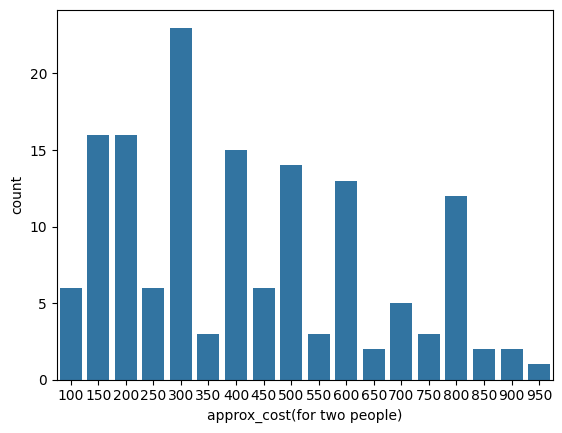

In [ ]:
couple_data=Data['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

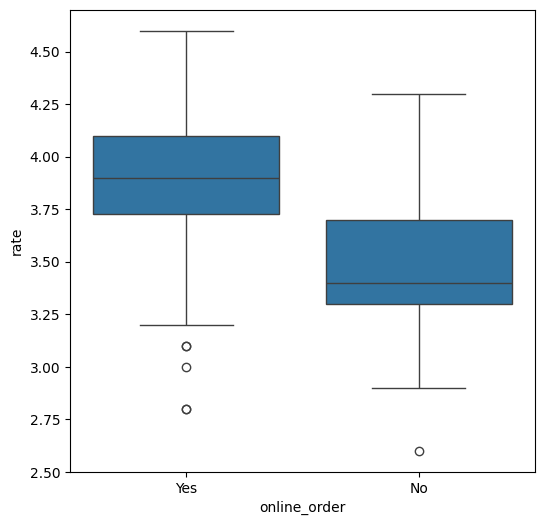

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = Data)


*Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.*

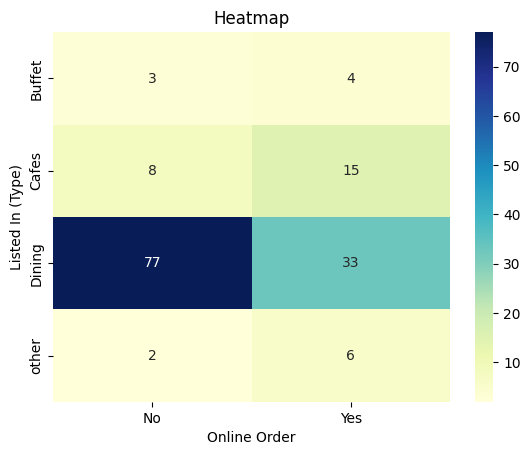

In [ ]:


pivot_table = Data.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.